# z-Scores

**Z-scores** measure how many standard deviations below or above the population mean a sample statistic is. When we know the population parameters $\mu$ and $\sigma$, we can reconstruct the sampling distribution.

This is helpful when we consider hypothesis testing, where we typically assume $H_0$ is the population mean and both the population's mean and standard deviation are known.

### z-Score for a Single Data Point

Given a population mean and standard deviation, $\mu$ and $\sigma$ respectively, and a data point, $x$, then we have $$z = \frac{x-\mu}{\sigma}$$

We can think of the numerator as the difference in a sample from the mean while the denominator divides by the variability in the population.

### z-Score for a Sample Mean

Given a population mean and standard deviation, $\mu$ and $\sigma$ respectively, and a sample mean, $\bar{x}$, fora a sample of size $n$, then we have $$z = \frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{n}}}$$

where $\frac{\sigma}{\sqrt{n}}$ is the standard error of the mean.

### Interpretation

Thus, a positive z-score indicates the statistic is greater than the corresponding population parameter. A negative z-score indicates the statistic is less than the corresponding population parameter.

For a one-tailed test ($p\lt (1-\alpha)$) and standard significance levels of $\alpha=0.05$, $\alpha=0.01$, and $\alpha=0.001$, the corresponding z-scores are $1.65$, $2.32$, and $3.08$, respectively. Sample statistics that result in z-scores greater than the z-scores for the corresponding significance level would be considered unlikely causing a researcher to reject the null hypothesis.

For a two-tailed test and standard significance levels of $\alpha=0.05$, $\alpha=0.01$, and $\alpha=0.001$, the corresponding z-scores are $\pm 1.96$, $\pm 2.58$, and $\pm 3.29$, respectively.

Values above and/or below these z-scores correspond to the critical regions defined by $H_0$ and $H_1$.

### Probability of a z-Score

To compute the probability of a given z-score, note that we can use the cumulative distribution function. Python's `scipy.stats.norm` has a function where the z-score can be passed as an argument. Alternatively, a lookup table, or [z-table](https://s3.amazonaws.com/udacity-hosted-downloads/ZTable.jpg), can be used. 

### 68-95-99.7 Rule

Given a normal distribution, we can compute the percentage of values that are contained within one, two, and three standard deviations.

In [4]:
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

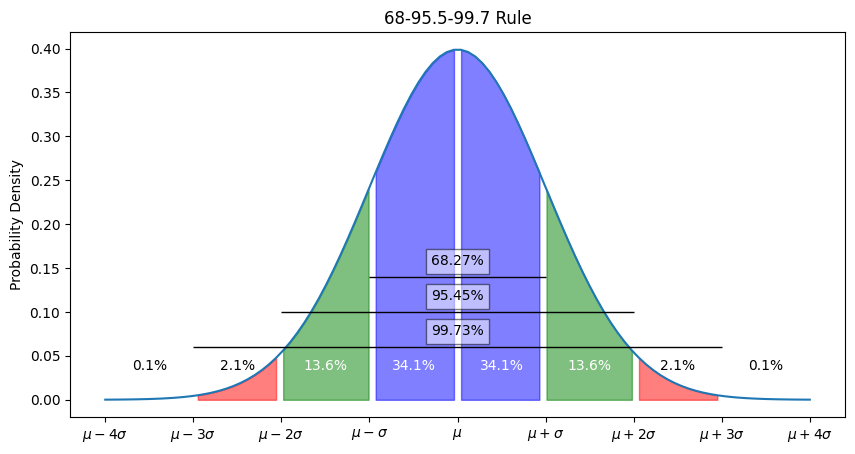

In [5]:
# Plot the normal distribution
mu = 0
variance = 1
epsilon = 1e-2
sigma = math.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, stats.norm.pdf(x, mu, sigma))

# Plot the normal distribution with shaded regions for 1, 2, and 3 standard deviations
tick_values = [i for i in range(-4, 5)]
tick_labels = ['$\mu-4\sigma$', '$\mu-3\sigma$', '$\mu-2\sigma$', '$\mu-\sigma$','$\mu$','$\mu+\sigma$','$\mu+2\sigma$','$\mu+3\sigma$', '$\mu+4\sigma$']
plt.xticks(tick_values, tick_labels)
for i, color in enumerate(['blue', 'green', 'red']):
    ax.fill_between(x, stats.norm.pdf(x, mu, sigma), where=(x >= mu - (i+1)*sigma) & (x < mu - i*sigma), color=color, alpha=0.5)
    ax.fill_between(x, stats.norm.pdf(x, mu, sigma), where=(x >= mu + i*sigma) & (x < mu + (i+1)*sigma), color=color, alpha=0.5)

# Add text labels for the proportion represented by the shaded regions
midpoints = mu + sigma*np.arange(-3.5, 4)
percents = [0.1, 2.1, 13.6, 34.1, 34.1, 13.6, 2.1, 0.1]
colors = [*'kkwwwwkk']
for m, p, c in zip(
    midpoints, # midpoints of bounded regions
    percents,  # percents captured by bounded regions
    colors,    # colors of text labels
):
    ax.text(m, 0.03, f'{p}%', color=c, ha='center', va='bottom')

# Add lines for 68-95.5-99.7 rule
epsilon = 1e-2
for i, (height, percentage) in enumerate(zip([.14, .1, .06], [68.27, 95.45, 99.73])):
    ax.hlines(height, mu-(i+1)*sigma, mu+(i+1)*sigma, color='black', linewidth=1)
    ax.text(0, height+epsilon, f'{percentage}%', color='black', ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.5))

plt.title('68-95.5-99.7 Rule')
plt.ylabel('Probability Density')
plt.show()